# Multiple Linear Regression

In [156]:
import numpy as np
import pandas as pd
import math
import time
from sklearn.model_selection import train_test_split

Before executing the regression it is important to import the data and prepare the regression input, by reserving the $Y$ (target) and add a column with ones ($W_0$) in the input data ($X$).

In [159]:
rdata = pd.read_csv('sample_treino.csv') #read the data

X = rdata.iloc[:,0:len(rdata.columns)-1] # remove last
X = np.c_[np.ones(len(rdata)),X]      #add extra columns with ones

Y = rdata.iloc[:,len(rdata.columns)-1:len(rdata.columns)].values #saving the Y the cra
w = np.zeros([len(rdata.columns),1]) #the variables
#data_train, data_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.2, random_state=0)

To evaluate the regression we use the vectorized version of the mean square error function (MSE). Notice that @ is the same np.dot (describe in numpy documentation).

$ MSE(w) = \frac{1}{N} \sum_{i=1}^{N} {(X^T \cdot W - Y_i)^2}$

In [160]:
def MSE(X,Y,w):
    return np.sum(np.power(((X @ w)-Y),2))/len(X)

In [161]:
MSE(X,Y,w)

54.47995385562645

Once this implementation will use the gradient runner the first function that we must implement is: 

$\nabla RSS(w) = -2H^T (y - Hw)$

In [299]:
def grad_rss(w,X,Y):
    return -2 * ((X.T) @ (Y - (X @ w)))

Now we can implement the step_gradient method. Notice that the learning rate ( $ \alpha $ ) expresses the length of the step.

$ w^{t+1} = w^t + \alpha * \nabla RSS(w) $

In [173]:
def step_gradient(w,X,Y,learningRate):
    return w - (learningRate * grad_rss(w,X,Y))

The gradient_descent_runner method recivies as input (starting_w,X,Y, learning_rate, epsilon) where epsilon is the stop contodion of the method ( $||w||^2_2 \lt epsilon $).

In [170]:
def gradient_descent_runner(starting_w,X,Y, learning_rate, epsilon):
    w = starting_w
    grad = epsilon + 1
    i = 0
    while (np.linalg.norm(grad)>=epsilon):
        w = step_gradient(w, X, Y, learning_rate)
        grad = ng(w,X,Y)
        if (np.linalg.norm(grad) == np.inf):
            return w,i
        i+= 1
    return w,i

Exectuinng the gradient descent...

In [298]:
tic = time.time()
lr = 0.00003
epsilon = 0.9
model,i = gradient_descent_runner(w,data_train,Y_train,lr,epsilon)
toc = time.time()

print("The Gradient descendent converged in {0} iterations, with an error = {1}".format(i, MSE(X,Y,model)))
print("f(x) = {0:.3f}xCálculo1 + {1:.3f}xLPT + {2:.3f}xP1 + {3:.3f}xIC + {4:.3f}xCalculo2".format(model[1][0], model[2][0],
                                                                                                  model[3][0], model[4][0],
                                                                                                  model[5][0])
     )
print("Intercept : " + str(model[0]))
print("Executed: " + str(1000*(toc-tic)) + " ms")

The Gradient descendent converged in 27668 iterations, with an error = 0.4226496773721488
f(x) = 0.078xCálculo1 + 0.077xLPT + 0.195xP1 + 0.444xIC + -0.019xCalculo2
Intercept : [1.21036687]
Executed: 745.9185123443604 ms


## sklearn version

In [195]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
tic = time.time()
regressor.fit(data_train[:,1:], Y_train)
toc = time.time()

print("f(x) = {0:.3f}xCálculo1 + {1:.3f}xLPT + {2:.3f}xP1 + {3:.3f}xIC + {4:.3f}xCalculo2".format(regressor.coef_[0][0], regressor.coef_[0][1],
                                                                                                  regressor.coef_[0][2], regressor.coef_[0][3],
                                                                                                  regressor.coef_[0][4])
     )
print("Intercept : " + str(regressor.intercept_))
print("Versão vetorizada rodou em: " + str(1000*(toc-tic)) + " ms")

f(x) = 0.059xCálculo1 + 0.040xLPT + 0.197xP1 + 0.397xIC + -0.027xCalculo2
Intercept : [2.08412457]
Versão vetorizada rodou em: 2.9289722442626953 ms


In [219]:
Y_pred = regressor.predict(X[:,1:])

In [220]:
from sklearn import metrics 
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_pred))

Mean Squared Error: 0.42111360942208553


## Comparation sklearn vs mine gradient step runner

As shown in the Table below the model generated by the gradient descent and sklearn solution (the model) are quite similar, with small differences in the model coefficients. Notice that both solutions present a similar error ( 0.422 to gradient descent and 0.421 to sklearn); however, the sklearn execute 2ms while the gradient descent execute in 800ms.

In [255]:
skmodel = np.concatenate((np.array(regressor.intercept_),np.array(regressor.coef_[0])), axis=0)
pd.DataFrame({'mine':model.T[0], 'sklearn':skmodel})

,mine,sklearn
0,1.210367,2.084125
1,0.077698,0.058805
2,0.077098,0.039872
3,0.195499,0.196730
4,0.443625,0.397183
5,-0.019261,-0.026945


The error of both solutions is exposed in the FIgure below. The actual CRA values to each student are displayed as black dots and each model are ploted as lines. 

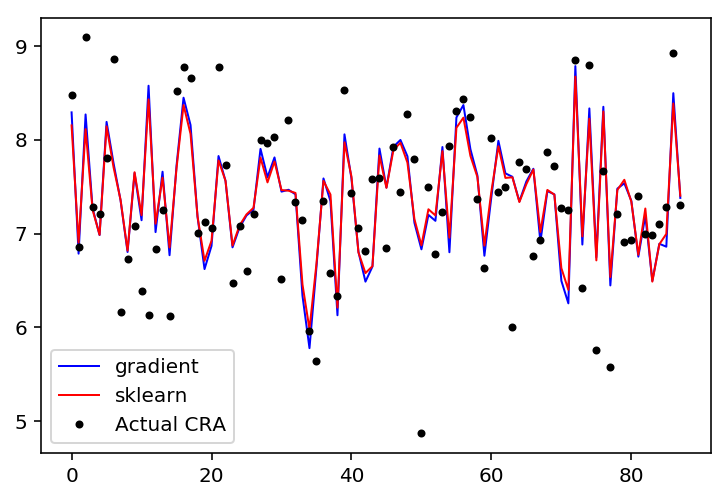

In [301]:
import matplotlib.pyplot as plt

# Data
Y_mine = X @ model
df=pd.DataFrame({'gradient': Y_mine.flatten(), 'sklearn': Y_pred.flatten(), 'Y': Y.flatten() })

%matplotlib inline

def plot(dpi,df):
    fig, ax=plt.subplots(dpi=dpi)
    ax.plot( 'gradient', data=df, marker='o', markerfacecolor='blue', color='blue', markersize=0 , linewidth=1)
    ax.plot( 'sklearn', data=df, marker='o', color='red', markersize=0 , linewidth=1)
    ax.plot( 'Y', data=df, marker='o', color='black', linewidth=0,markersize=3, linestyle='dashed', label="Actual CRA")
    ax.legend()
    
plot(2*72,df)